In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [2]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
Year = "2022"
Month = "05"
Day = "25"
BeadNumber = "00"
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [4]:
folderName=folder+"/Bead"+BeadNumber

In [5]:
"/data/new_trap/20220525/Bead00/NoShaking/"

'/data/new_trap/20220525/Bead00/NoShaking/'

In [6]:
def PSD_sum(folderName,filePrefix,maxFile=10000):
    # load the files
    files = load_dir_sorted(dirname=folderName,file_prefix=filePrefix,max_file=maxFile)
    
    XSum=0
    YSum=0
    ZSum=0

    for i in range(len(files)):
        if(np.std(files[i].xyz2[0])<0.1):
            XSum += files[i].xyz2[0]
            YSum  += files[i].xyz2[1]
            ZSum  += files[i].xyz2[2]
        else: print("dataset %d seems corrupt" %i)   
            
    fsamp = 5000
    res=50000
    xSumPSD, freqs = matplotlib.mlab.psd(signal.detrend(XSum), Fs = fsamp, NFFT = res)
    ySumPSD, freqs = matplotlib.mlab.psd(signal.detrend(YSum), Fs = fsamp, NFFT = res)
    zSumPSD, freqs = matplotlib.mlab.psd(signal.detrend(ZSum), Fs = fsamp, NFFT = res)
    files=0
    return freqs,xSumPSD,ySumPSD,zSumPSD

In [ ]:
def sum_PSD(folderName,filePrefix,maxFile=10000):
    # load the files
    files = load_dir_sorted(dirname=folderName,file_prefix=filePrefix,max_file=maxFile)
    
    XSumPSD=0
    YSumPSD=0
    freqs=0
    fsamp=5000
    res=50000
    for i in range(len(files)):
        if(np.std(files[i].xyz2[0])<0.1):
            xSumPSD, freqs += matplotlib.mlab.psd(signal.detrend(files[i].xyz2[0), Fs = fsamp, NFFT = res)
            ySumPSD, freqs += matplotlib.mlab.psd(signal.detrend(files[i].xyz2[0), Fs = fsamp, NFFT = res)
        else: print("dataset %d seems corrupt" %i)   
            

    return freqs,xSumPSD,ySumPSD,zSumPSD

In [7]:
freqs,noShakingX,noShakingY,noShakingZ = PSD_sum(folderName=folderName+"/NoShaking/",filePrefix="NoShaking",)

100%|██████████| 1000/1000 [09:49<00:00,  1.06it/s]


1000  files in folder
1000  files loaded
dataset 14 seems corrupt
dataset 18 seems corrupt
dataset 19 seems corrupt
dataset 20 seems corrupt
dataset 21 seems corrupt
dataset 23 seems corrupt
dataset 24 seems corrupt
dataset 25 seems corrupt
dataset 26 seems corrupt
dataset 27 seems corrupt
dataset 28 seems corrupt
dataset 29 seems corrupt
dataset 31 seems corrupt
dataset 32 seems corrupt
dataset 33 seems corrupt
dataset 34 seems corrupt
dataset 35 seems corrupt
dataset 36 seems corrupt
dataset 37 seems corrupt
dataset 38 seems corrupt
dataset 39 seems corrupt
dataset 40 seems corrupt
dataset 41 seems corrupt
dataset 42 seems corrupt
dataset 43 seems corrupt
dataset 44 seems corrupt
dataset 45 seems corrupt
dataset 46 seems corrupt
dataset 47 seems corrupt
dataset 48 seems corrupt
dataset 49 seems corrupt
dataset 63 seems corrupt


In [10]:
freqs,ShakingNoServo13X,ShakingNoServo13Y,ShakingNoServo13Z = PSD_sum(folderName=folderName+"/Shaking/13Hz/NoServo/1/",filePrefix="Shaking",maxFile=100)

100%|██████████| 100/100 [00:54<00:00,  1.80it/s]

100  files in folder
100  files loaded
dataset 98 seems corrupt


In [14]:
freqs,ShakingNoServo13AirX,ShakingNoServo13AirY,ShakingNoServo13AirZ = PSD_sum(folderName=folderName+"/Shaking/3Hz/NoServo/1/",filePrefix="Shaking",maxFile=1000)

100%|██████████| 1000/1000 [24:45<00:00,  1.68it/s]


1000  files in folder
1000  files loaded


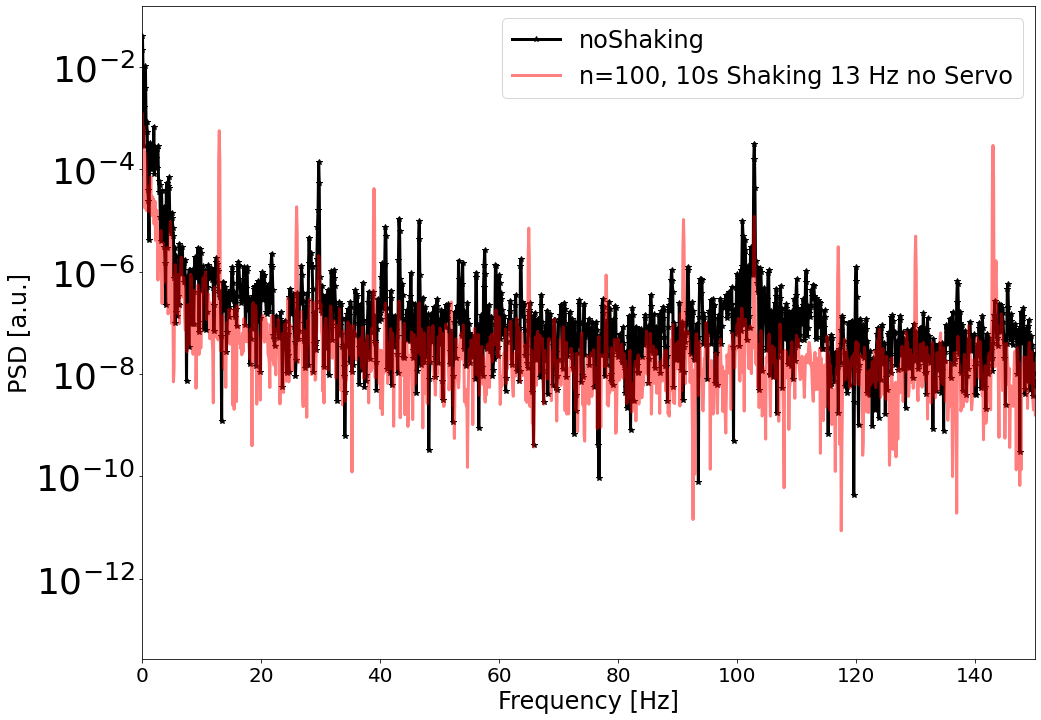

In [12]:
plt.plot(freqs,noShakingY,label="noShaking",c="black",lw=3,marker="*")#,ms=10)
plt.plot(freqs,ShakingNoServo13X,alpha=0.5,label="n=100, 10s Shaking 13 Hz no Servo",c="red",lw=3)#,marker="*",ms=10)
plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

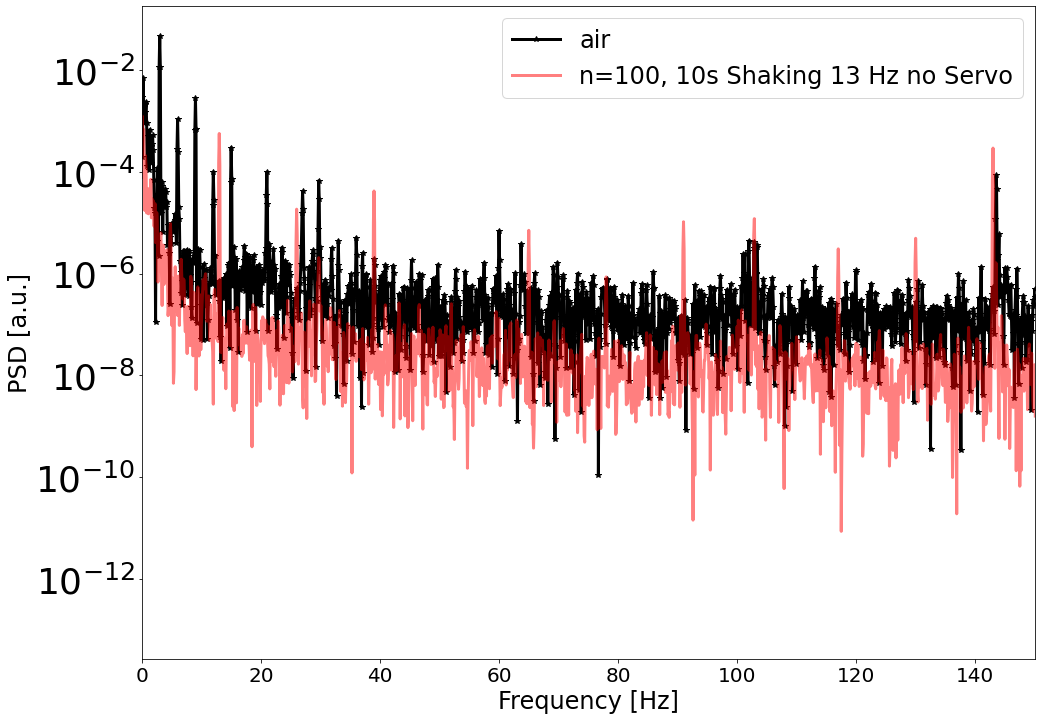

In [15]:
plt.plot(freqs,ShakingNoServo13AirX,label="air",c="black",lw=3,marker="*")#,ms=10)
plt.plot(freqs,ShakingNoServo13X,alpha=0.5,label="n=100, 10s Shaking 13 Hz no Servo",c="red",lw=3)#,marker="*",ms=10)
plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

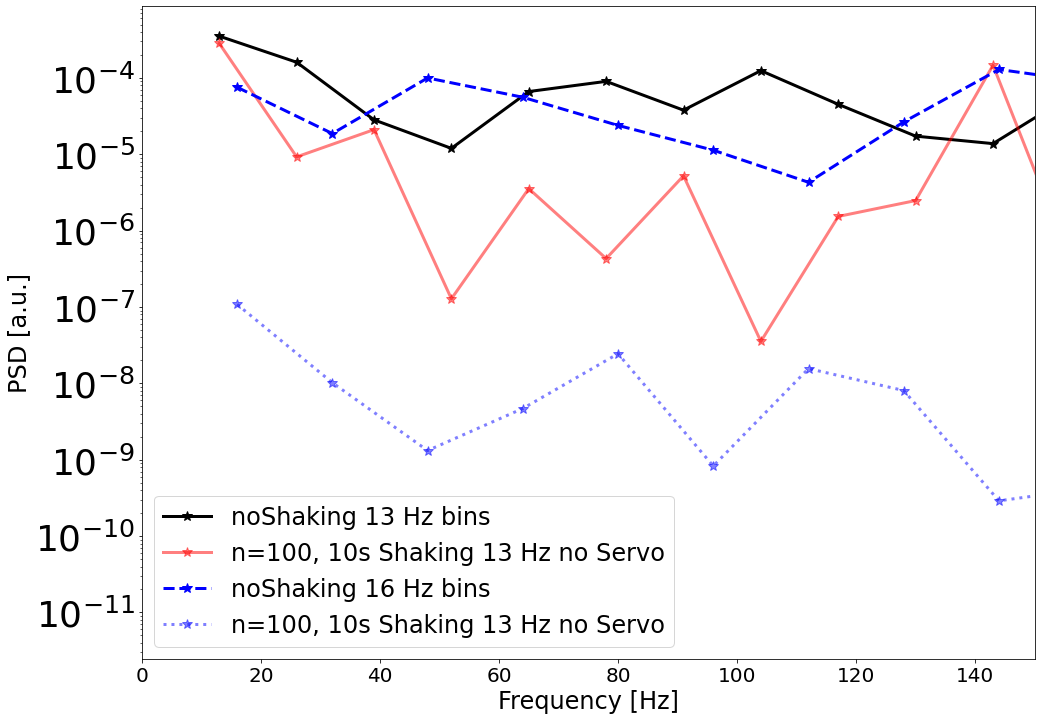

In [16]:
plt.plot(freqs[130::130],noShakingX[130::130],label="noShaking 13 Hz bins",c="black",lw=3,marker="*",ms=10)
plt.plot(freqs[130::130],ShakingNoServo13X[130::130]/2,alpha=0.5,label="n=100, 10s Shaking 13 Hz no Servo",c="red",lw=3,marker="*",ms=10)
plt.plot(freqs[160::160],noShakingX[160::160],label="noShaking 16 Hz bins",c="blue",ls="dashed",lw=3,marker="*",ms=10)
plt.plot(freqs[160::160],ShakingNoServo13X[160::160]/2,alpha=0.5,label="n=100, 10s Shaking 13 Hz no Servo",c="blue",ls="dotted",lw=3,marker="*",ms=10)

plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

NameError: name 'ShakingNoServo13_2VX' is not defined

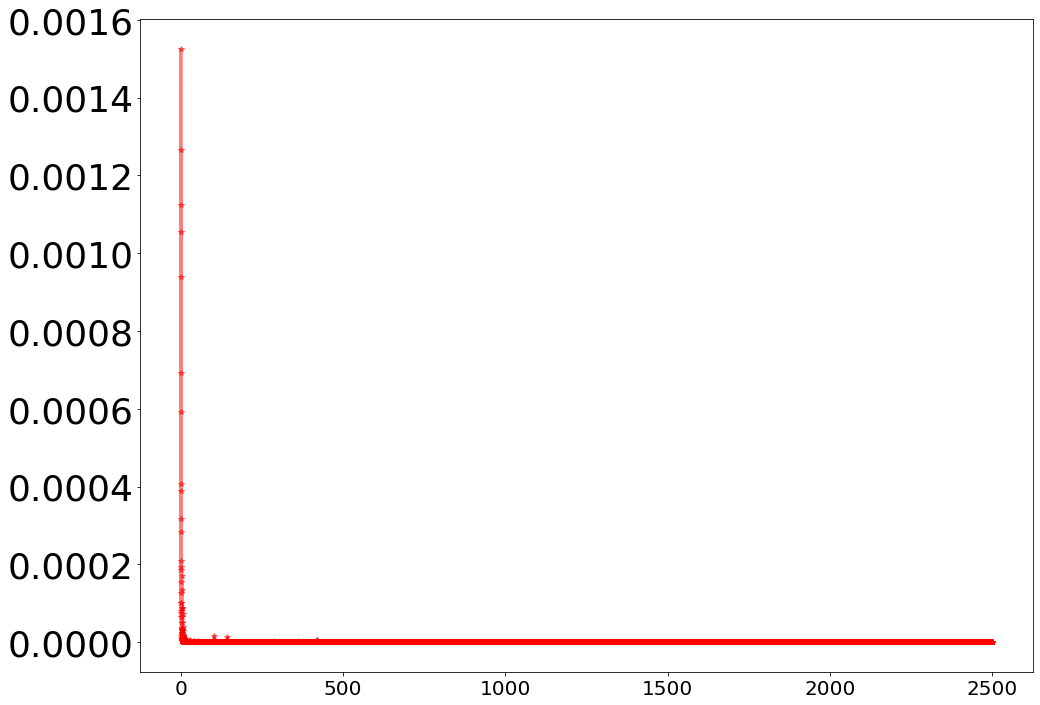

In [21]:
plt.plot(freqs,ShakingNoServo13X,alpha=0.5,label="n=10, 10s Shaking 13 Hz 1V",c="red",lw=3,marker="*")#,ms=10)
plt.plot(freqs,ShakingNoServo13_2VX,label="n=10, 10s Shaking 13 Hz 2V",c="black",lw=3)#,marker="*",ms=10)
plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

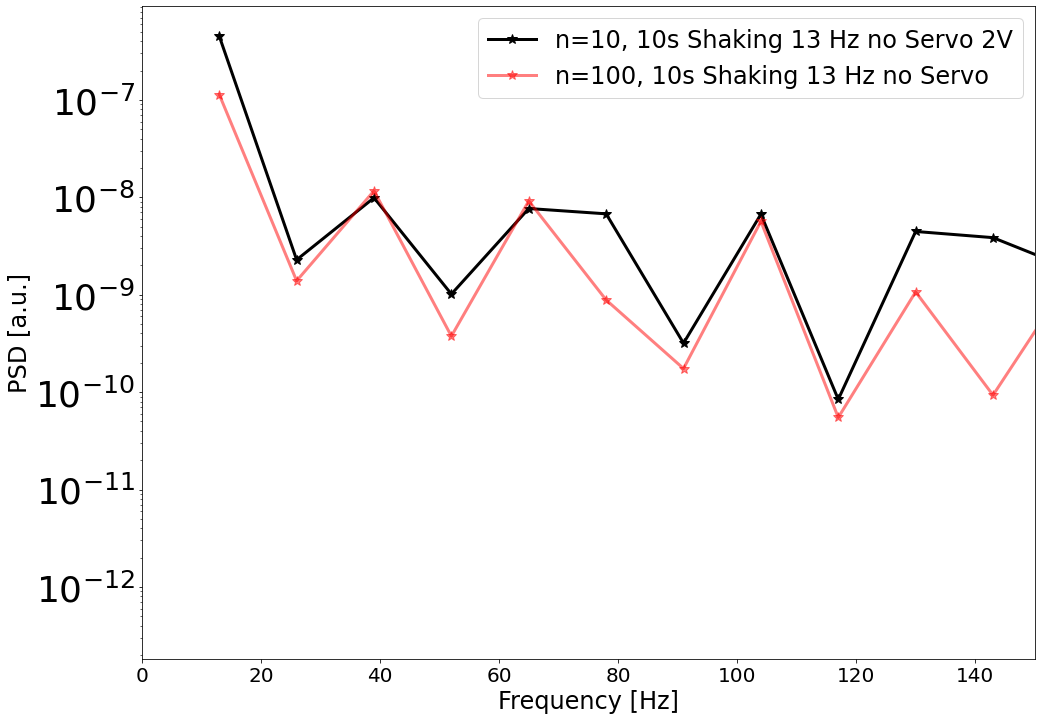

In [36]:
plt.plot(freqs[130::130],ShakingNoServo13_2VX[130::130],label="n=10, 10s Shaking 13 Hz no Servo 2V",c="black",lw=3,marker="*",ms=10)
plt.plot(freqs[130::130],ShakingNoServo13X[130::130],alpha=0.5,label="n=100, 10s Shaking 13 Hz no Servo",c="red",lw=3,marker="*",ms=10)
#plt.plot(freqs[160::160],ShakingNoServo13_2VX[160::160],label="noShaking 16 Hz bins",c="blue",ls="dashed",lw=3,marker="*",ms=10)
#plt.plot(freqs[160::160],ShakingNoServo13X[160::160]/2,alpha=0.5,label="n=100, 10s Shaking 16 Hz no Servo",c="blue",ls="dotted",lw=3,marker="*",ms=10)

plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

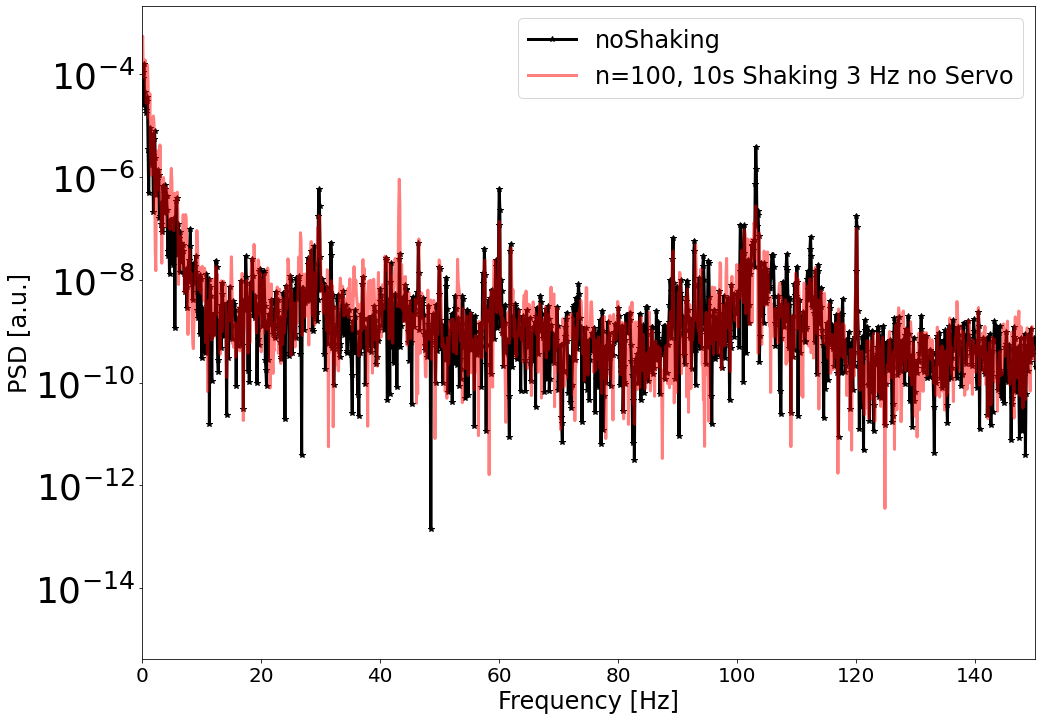

In [39]:
plt.plot(freqs,noShakingX,label="noShaking",c="black",lw=3,marker="*")#,ms=10)
plt.plot(freqs,ShakingNoServo3X/2,alpha=0.5,label="n=100, 10s Shaking 3 Hz no Servo",c="red",lw=3)#,marker="*",ms=10)
plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

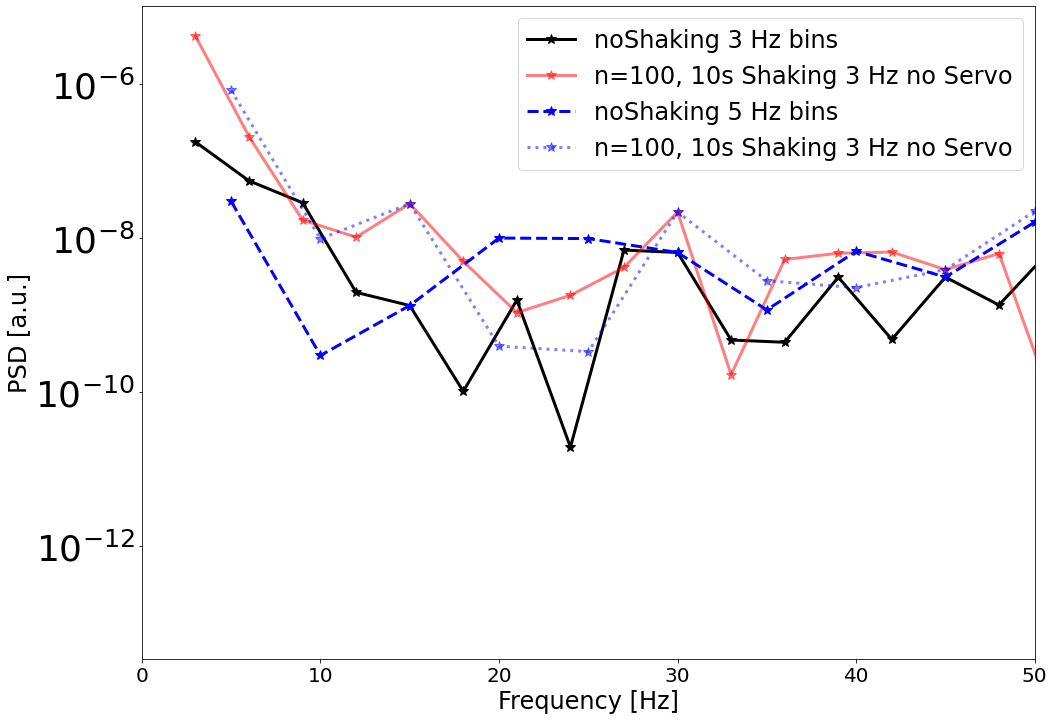

In [47]:
plt.plot(freqs[30::30],noShakingX[30::30],label="noShaking 3 Hz bins",c="black",lw=3,marker="*",ms=10)
plt.plot(freqs[30::30],ShakingNoServo3X[30::30]/2,alpha=0.5,label="n=100, 10s Shaking 3 Hz no Servo",c="red",lw=3,marker="*",ms=10)
plt.plot(freqs[50::50],noShakingX[50::50],label="noShaking 5 Hz bins",c="blue",ls="dashed",lw=3,marker="*",ms=10)
plt.plot(freqs[50::50],ShakingNoServo3X[50::50]/2,alpha=0.5,label="n=100, 10s Shaking 3 Hz no Servo",c="blue",ls="dotted",lw=3,marker="*",ms=10)

plt.legend()
plt.xlim(0,50)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

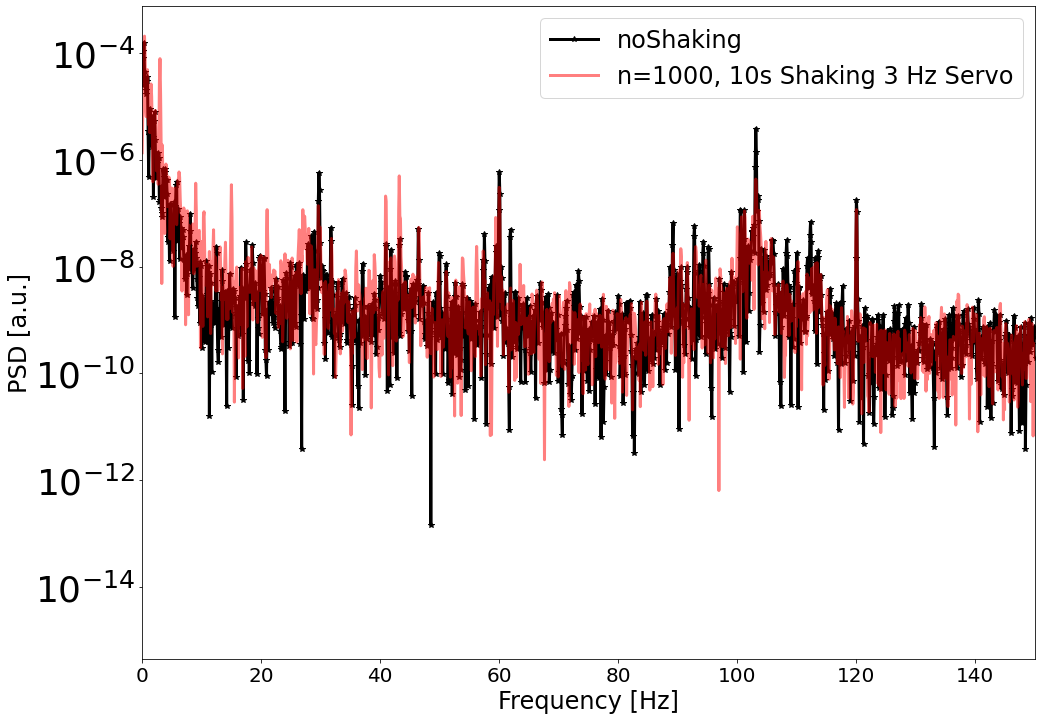

In [49]:
plt.plot(freqs,noShakingX,label="noShaking",c="black",lw=3,marker="*")#,ms=10)
plt.plot(freqs,ShakingServo3X/20,alpha=0.5,label="n=1000, 10s Shaking 3 Hz Servo",c="red",lw=3)#,marker="*",ms=10)
plt.legend()
plt.xlim(0,150)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

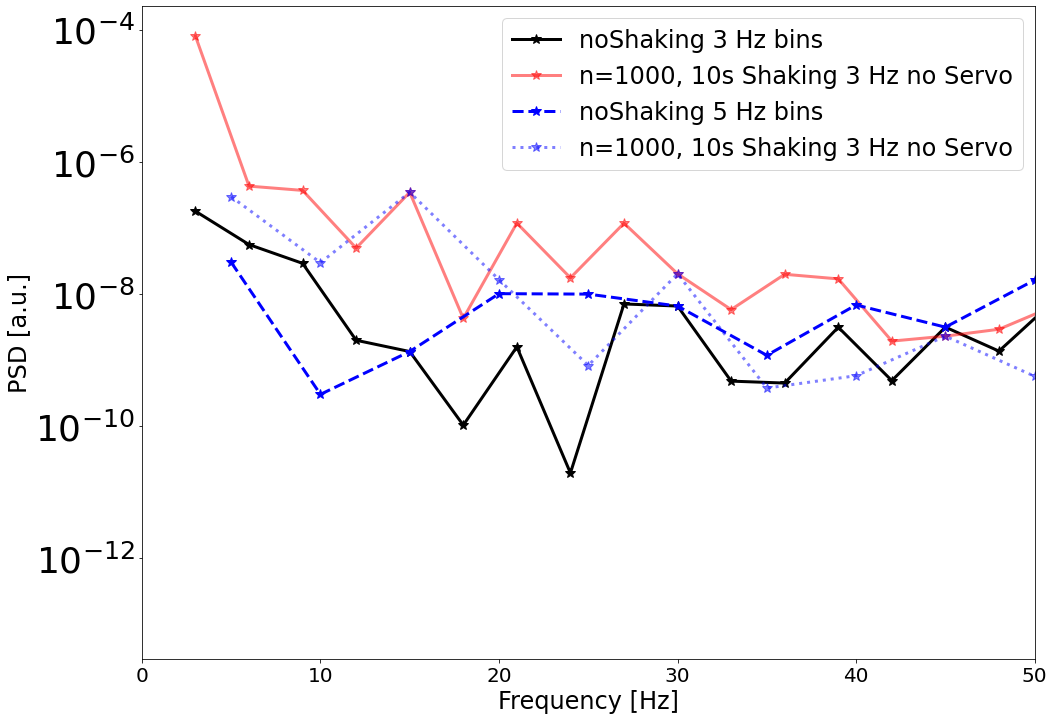

In [51]:
plt.plot(freqs[30::30],noShakingX[30::30],label="noShaking 3 Hz bins",c="black",lw=3,marker="*",ms=10)
plt.plot(freqs[30::30],ShakingServo3X[30::30]/20,alpha=0.5,label="n=1000, 10s Shaking 3 Hz no Servo",c="red",lw=3,marker="*",ms=10)
plt.plot(freqs[50::50],noShakingX[50::50],label="noShaking 5 Hz bins",c="blue",ls="dashed",lw=3,marker="*",ms=10)
plt.plot(freqs[50::50],ShakingServo3X[50::50]/20,alpha=0.5,label="n=1000, 10s Shaking 3 Hz no Servo",c="blue",ls="dotted",lw=3,marker="*",ms=10)

plt.legend()
plt.xlim(0,50)
plt.yscale("log")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [a.u.]")
plt.show()

In [112]:
files1 = load_dir(dirname=folderName+"ShakingNoServo13Hz/",file_prefix="Shaking",max_file=1000)
files2 = load_dir(dirname=folderName+"NoShaking/",file_prefix="NoShaking",max_file=1000)




  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<00:28,  3.52it/s]

  2%|▏         | 2/100 [00:00<00:28,  3.49it/s]

  3%|▎         | 3/100 [00:00<00:29,  3.32it/s]

  4%|▍         | 4/100 [00:01<00:27,  3.46it/s]

  5%|▌         | 5/100 [00:01<00:27,  3.41it/s]

  6%|▌         | 6/100 [00:01<00:26,  3.51it/s]

  7%|▋         | 7/100 [00:02<00:26,  3.56it/s]

  8%|▊         | 8/100 [00:02<00:26,  3.50it/s]

  9%|▉         | 9/100 [00:02<00:25,  3.63it/s]

 10%|█         | 10/100 [00:02<00:25,  3.49it/s]

 11%|█         | 11/100 [00:03<00:25,  3.48it/s]

 12%|█▏        | 12/100 [00:03<00:26,  3.37it/s]

 13%|█▎        | 13/100 [00:03<00:25,  3.39it/s]

 14%|█▍        | 14/100 [00:04<00:25,  3.44it/s]

 15%|█▌        | 15/100 [00:04<00:24,  3.51it/s]

 16%|█▌        | 16/100 [00:04<00:24,  3.49it/s]

 17%|█▋        | 17/100 [00:04<00:23,  3.49it/s]

 18%|█▊        | 18/100 [00:05<00:23,  3.56it/s]

 19%|█▉        | 19/100 [00:05<00:22,  3.53it/s]

 20%|██        |

100  files in folder
100  files loaded




  2%|▏         | 1/50 [00:00<00:15,  3.08it/s]

  4%|▍         | 2/50 [00:00<00:15,  3.14it/s]

  6%|▌         | 3/50 [00:00<00:14,  3.24it/s]

  8%|▊         | 4/50 [00:01<00:14,  3.22it/s]

 10%|█         | 5/50 [00:01<00:13,  3.31it/s]

 12%|█▏        | 6/50 [00:01<00:14,  3.05it/s]

 14%|█▍        | 7/50 [00:02<00:14,  3.01it/s]

 16%|█▌        | 8/50 [00:02<00:15,  2.73it/s]

 18%|█▊        | 9/50 [00:03<00:15,  2.63it/s]

 20%|██        | 10/50 [00:03<00:13,  2.90it/s]

 22%|██▏       | 11/50 [00:03<00:14,  2.65it/s]

 24%|██▍       | 12/50 [00:04<00:15,  2.39it/s]

 26%|██▌       | 13/50 [00:04<00:15,  2.41it/s]

 28%|██▊       | 14/50 [00:05<00:14,  2.54it/s]

 30%|███       | 15/50 [00:05<00:12,  2.79it/s]

 32%|███▏      | 16/50 [00:05<00:12,  2.70it/s]

 34%|███▍      | 17/50 [00:06<00:12,  2.64it/s]

 36%|███▌      | 18/50 [00:06<00:11,  2.80it/s]

 38%|███▊      | 19/50 [00:06<00:12,  2.57it/s]

 40%|████      | 20/50 [00:07<00:12,  2.42it/s]

 42%|████▏     | 21/50 [00:

50  files in folder
50  files loaded


In [132]:
c1 =[correlation(files1[i].cant_pos[1],files1[i].xyz2[0],5000,13) for i in range(len(files1)) if np.std(files1[i].xyz2[0])<0.1]
c2 =[correlation(files2[i].cant_pos[1],files2[i].xyz2[0],5000,13) for i in range(len(files2)) if np.std(files2[i].xyz2[0])<0.1]


In [139]:
inphase1=[]
inphase2 =[]
for elements in c1:
    inphase1.append(elements[0])
for elements in c2:
    inphase2.append(elements[0])    
    

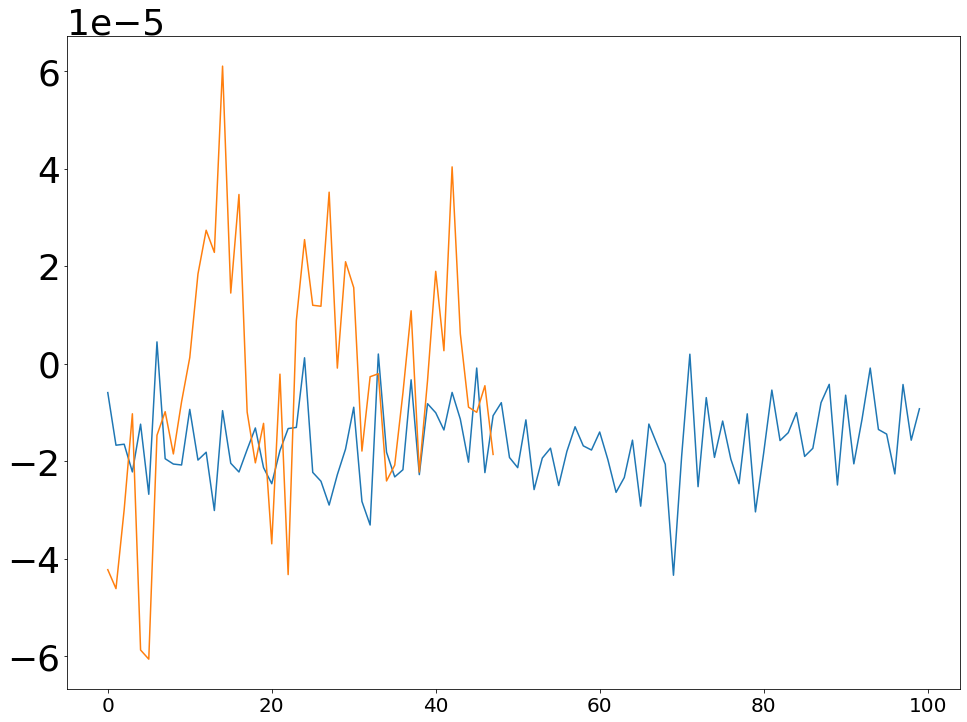

In [140]:
plt.plot(inphase1)
plt.plot(inphase2)

In [149]:
def spin_data_to_amp_and_phase(data,fsamp,res):
    data_det=signal.detrend(data)
    res = res
    fsamp = fsamp # stays hard coded for now
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    spin_FFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    spin_nsd = norm**2 * (spin_FFT * spin_FFT.conj()).real
    spin_phase=np.angle(spin_FFT)
    return freqs,spin_nsd,spin_phase


In [188]:
s = spin_data_to_amp_and_phase(files1[5].xyz2[1],5000,50000)
s2 = spin_data_to_amp_and_phase(files1[25].xyz2[1],5000,50000)

In [189]:
t = spin_data_to_amp_and_phase(files1[5].cant_pos[1],5000,50000)
t2 = spin_data_to_amp_and_phase(files1[15].cant_pos[1],5000,50000)

(0.0, 130.0)

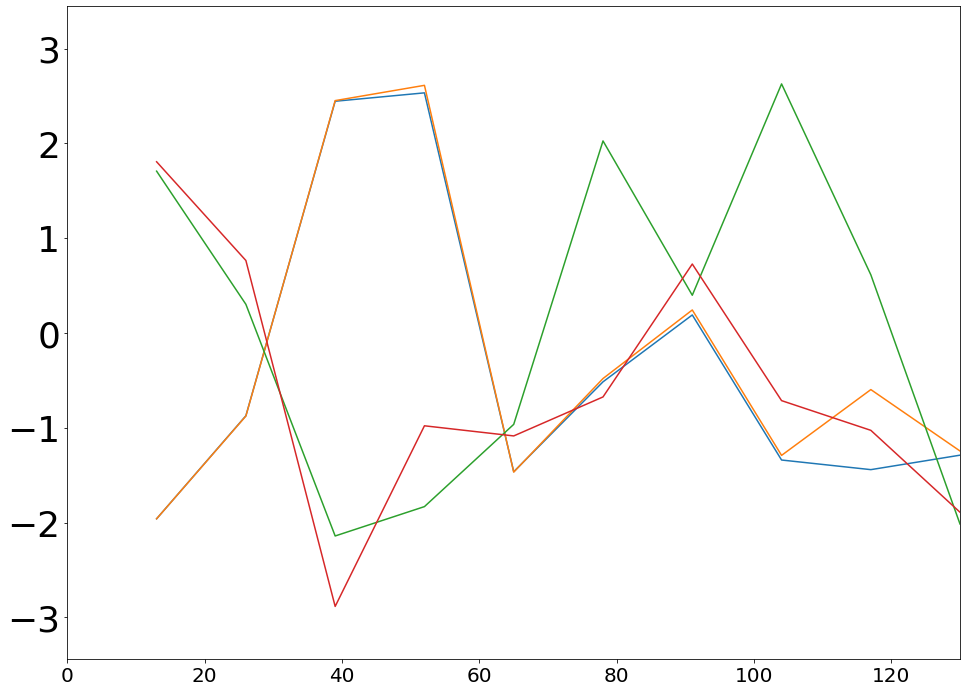

In [191]:
plt.plot(freqs[130::130],t[2][130::130])
plt.plot(freqs[130::130],t2[2][130::130])
plt.plot(freqs[130::130],s[2][130::130])
plt.plot(freqs[130::130],s2[2][130::130])
plt.xlim(0,130)